# Formación Dual BigData+: Módulo 0
- **Alumno:** Hugo Ruiz Sánchez.
- **Correo electrónico:** hugoruizschz@gmail.com

## Introducción al mundo de Big Data. 

### Tarea: Big Data y digitalización en Siemens Mobility


**¿Cuál es la reducción de costes de mantenimiento que se puede alcanzar con Siemens Digital Depot?**
El mantenimiento predictivo (*predictive maintenance*) permite reducir los tiempos de inactividad de los trenes identificando los problemas antes de que se produzcan, lo que permite realizar las reparaciones fuera del horario de servicio y evitar que los trenes se queden parados.

Ello facilita planificar con mayor precisión las necesidades de piezas de repuesto, lo que reduce el riesgo de tener que realizar pedidos urgentes y costosos.

En concreto, el Siemens Digital Depot utiliza las siguientes tecnologías para alcanzar estas ventajas:

- **Sensorización**: Los trenes están equipados con sensores que recopilan datos sobre su estado en tiempo real. Estos datos se envían a la nube, donde son analizados por algoritmos de aprendizaje automático.
- **Análisis de datos**: Los algoritmos de aprendizaje automático analizan los datos para identificar patrones y tendencias que pueden indicar la presencia de un problema.
- **Planeamiento de mantenimiento**: El sistema de planificación de mantenimiento utiliza los datos analizados para generar un plan de mantenimiento personalizado para cada tren.

El Siemens Digital Depot ya está siendo utilizado por operadores ferroviarios de todo el mundo, con resultados muy positivos. Por ejemplo, el operador ferroviario alemán Deutsche Bahn ha logrado reducir los costes de mantenimiento de sus trenes en un 25% gracias al uso del Siemens Digital Depot.



#### Fuentes empleadas

- Vídeo de Siemens Mobility: https://youtu.be/E7-3ljkN1AU?si=3DtRegv0sEHg_jel

## Opcional: Presentación y preparación de los datos para el análisis

Aunque no era necesario, he decidido **seguir la exposición del profesor y verificar todos los cambios que ha hecho a lo largo de la clase**.

 ### Importar las librerías necesarias

In [1]:
import pandas as pd # Importar librería de pandas, para la gestión de los datos, asociándola como "pd", a través del cual llamaremos a sus métodos.
import matplotlib.pyplot as plt
import seaborn as sns

pth = "dataset_reto.csv" # Establecer la localización del archivo csv ("path") donde se ubica la base de datos ("dataset").
df = pd.read_csv(pth) # Ordenar a la librería la lectura del archivo presentado en el path, asociandolo al objeto df ("DataFrame") 

### Volumen de los datos: filas y columnas.

In [2]:
df.shape # Arroja las filas y columnas de la tabla en forma de tupla.

(5423, 7)

Nótese cómo estos resultados ( *5423 registros en total* ) ya han sido previamente modificados por el profesor, para **eliminar el problema de los duplicados**.

### Explicación de cada dato.

In [3]:
df.head() # Por defecto, arroja una muestra de los cinco primeros elementos de la tabla (tail hace lo mismo, con los ultimos)

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
0,desarrollador/a php-moodl,Madrid,2022-09-30,"['php', 'lms', 'moodle', 'mysql']",31500.0,7,2022-10-02
1,analista programador spark/scala,Madrid,2022-09-30,"['scala', 'spark']",31500.0,0,2022-10-02
2,desarrollador de android,Madrid,2022-10-02,['android'],no disponible,2,2022-10-02
3,administrador/a microsoft azure - remoto,Online,2022-10-02,"['hyper v', 'azure', 'itil', 'mcafee', 'o365']",31500.0,22,2022-10-02
4,hardware test engineer (automoción),Tarragona,2022-10-02,"['python', 'testing']",no disponible,2,2022-10-02


- De las siete columnas, la información correspondiente a **jobtitle** puede considerarse prescindible, pues dada su variabilidad, la tarea extraer información relevante de los títulos puede no resultar compensatoria. 
- La columna **date**, es decir, la fecha en que una determinada oferta fue publicada, nos ofrece la situación en el mercado de una determinada tecnología.
- La **city** o ciudad indica la localización desde la cual se emite la oferta y se requiere el puesto.
- La cantidad de **candidates** representa la oferta de empeados, es decir, la cantidad de personas que aspiran a ese puesto.
- Las **skills** son aquellas tecnologías solicitadas por la empresa. 
- El **salary** es un parámetro importante, sobre todo en el plano personal.
- La columna **copy** no ofrece información especialmente relevante, sino que solo indica la fecha en que fue introducido un registro en la base de datos. 
- La conjunción entre **candidades** y **skills** puede arrojarnos la demanda de alguna tecnología determinada; que si se segmenta con la **date**, puede permitirnos apreciar la situación de una tecnología a lo largo del tiempo, e incluso en función de la **city**. 

### El problema de la columna *"Salary"*

In [4]:
df['Salary'].value_counts() # Agrupa los valores y los cuenta. 

no disponible        3679
31500.0               112
34500.0               111
33000.0               111
39000.0               101
                     ... 
5407.200000000001       1
5170.799999999999       1
7500.0                  1
10800.0                 1
68000.0                 1
Name: Salary, Length: 83, dtype: int64

#### Porcentaje de las ofertas que no ofrecen salario

Desgraciadamente, 3679 de 5423 ofertas **no contienen información de salario**. Puede ser interesante averigüar el porcentaje, para ello podemos hacer una función: 

In [5]:

def porcentaje_no_salario (df): 
    ofertas_totales= len(df)
    ofertas_no_salario = df['Salary'].value_counts()['no disponible']
    return ofertas_no_salario/ofertas_totales*100

porcentaje_no_salario(df)


67.84067859118569

¡Casi un **70%** de las ofertas no informan del salario!

### El problema de la columna *Copy*

In [6]:
df['Copy'].value_counts() # Agrupa los valores y los cuenta: en este caso, cuándo fueron recopilados los datos en la base de datos y su cantidad. 

2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: Copy, dtype: int64

Es importante saber que **los anuncios recogidos cada mes no tienen por qué ser nuevos**, por lo que debe considerarse el mes para evitar una mala interpretación de los datos. 

In [7]:
df['Jobtitle'].value_counts()[df['Jobtitle'].value_counts()==9] # En base a la cantidad agrupada de Jobtitle, comprobar dentro de Jobtitle que registros verifican que value_counts>1

it business analys    9
devops engi           9
frontend develop      9
Name: Jobtitle, dtype: int64

El profesor ha hecho un buen trabajo, dado que nos ha facilitado la base de datos libre de repeticiones; por eso, los resultados de esta consulta no se ajustan a los del vídeo.

In [8]:
df [df['Jobtitle'] == "it business analys"] # Dentro de la columna "Jobtitle", comprobar los registros iguales al titulo "it business analys" que parecía repetirse

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
235,it business analys,Barcelona,2022-09-20,"['jira', 'agile']",no disponible,21,2022-10-02
317,it business analys,Madrid,2022-06-15,"['analyst', 'it']",37500.0,19,2022-10-02
970,it business analys,Murcia,2022-07-20,"['analytical software', 'business analyst']",no disponible,20,2022-10-16
973,it business analys,Madrid,2022-07-19,['software'],52500.0,32,2022-10-16
2565,it business analys,Madrid,2022-11-06,['business analyst'],no disponible,11,2022-11-20
2615,it business analys,Valencia,2022-09-30,"['testlink', 'spira test', 'scrum', 'hp alm']",no disponible,24,2022-11-20
4405,it business analys,Madrid,2022-10-01,"['itil', 'sap']",no disponible,9,2022-11-27
5205,it business analys,Madrid,2022-06-29,"['sql', 'rest api']",no disponible,11,2022-11-27
5309,it business analys,Madrid,2022-03-01,"['java', 'rest api']",no disponible,10,2022-11-27


Esta comprobación verifica que, aunque parece que **hay información repetida**, cada oferta es diferente. Efectivamente ¡la base de datos ya está libre de duplicados! 

### ¿Cómo se eliminarían los duplicados?

In [9]:
df = df.drop_duplicates(['Jobtitle', 'City','Skills'], keep ="last"); # Elimina los duplicados en base a mismo titulo, ciudad y skills. Mantiene los ultimos, es decir, los más actualizados.

In [10]:
print (len(df)); # Imprime las filas de la tabla,

5423


In [11]:
df.Copy.value_counts() # Mostrar los registros en función de las fechas de Copy.

2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: Copy, dtype: int64

En definitiva, esta es la base de datos con la que vamos a trabajar.

## Tarea 1

### Solución del alumno a la Tarea 1.1 : Crea un gráfico tipo barplot que muestre los 10 lugares con más ofertas de trabajo.
#### Extracción de las listas necesarias:

In [12]:
# Extracción de los recursos necesarios

# Extraer lista de los 10 lugares con más ofertas de trabajo 
ciudades_top_10_ofertas = pd.Series.tolist ( df['City'].value_counts()[0:10].index )

# Para la misma consulta, extraer el numero de ofertas para cada ciudad. 
no_ofertas_top_10_ciudad = pd.Series.tolist ( df['City'].value_counts(normalize=True)[0:10] *100) # Lo normaliza, es decir, hace el porcentaje respecto al total

# Ejemplo: 
df['City'].value_counts(normalize=True)[0:10] * 100


Madrid       37.304075
Online       21.390374
Barcelona    17.591739
Valencia      4.923474
Bizkaia       2.434077
Málaga        2.397197
Zaragoza      1.567398
Sevilla       1.493638
Murcia        0.977319
Alicante      0.940439
Name: City, dtype: float64

#### Gráfico:

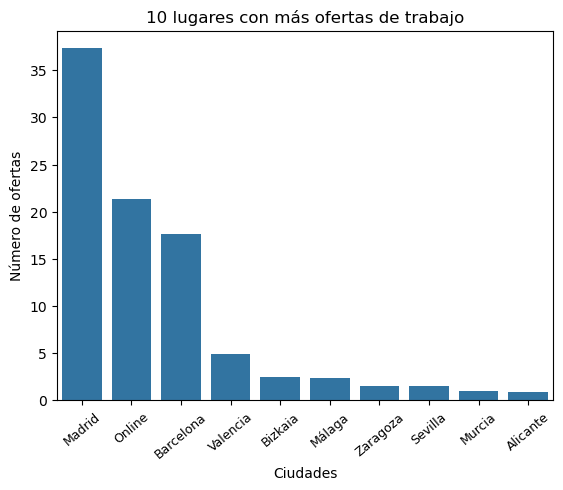

In [13]:
# Configurar el gráfico

# Datos 
sns.barplot(x=ciudades_top_10_ofertas, y=no_ofertas_top_10_ciudad)

# Estilo
plt.xticks(rotation=40, ha='center', fontsize=9) # Los nombres del eje X tendrán una rotación de 40º y un tamaño de 9, para que quepan. 
sns.set(style="darkgrid"); # Darkgrid es un estilo que me gusta

# Títulos
plt.title('10 lugares con más ofertas de trabajo')
plt.ylabel('Número de ofertas')
plt.xlabel('Ciudades')

# Muestreo
plt.show()

#### Cuestionario tarea 1.1


In [14]:
# Porcentaje de ofertas en Madrid
df['City'].value_counts()['Madrid']/df['City'].value_counts().sum()

0.3730407523510972

In [15]:
# Qué ciudad está en décimo lugar
df['City'].value_counts().index[9]

'Alicante'

### Solución del alumno a la Tarea 1.2 : Crea una tabla que contiene para cada ciudad el número de anuncios y la media de candidatos inscritos en los anuncios de estas ciudad.

In [16]:
# Creación de las dos series y conversión a lista
## Deben estar organizadas alfabeticamente en funcion de indice, para que todos los resultados coincidan 

lista_ciudad = pd.Series.tolist (df.groupby('City')['Candidates'].mean().sort_index().index)
lista_media_candidatos = pd.Series.tolist (df.groupby('City')['Candidates'].mean().sort_index())
lista_suma_ofertas = pd.Series.tolist (df['City'].value_counts().sort_index())

# Creación de diccioanrio 
## Una dataframe sigue una estructura parecida a los diccionarios de python. 

diccionarioCiudades = {
    "city" : lista_ciudad,
    "count" : lista_suma_ofertas,
    "candidates_average" :  lista_media_candidatos
}

# Conversión del diccionario en un dataframe

dataframeCiudades = pd.DataFrame(diccionarioCiudades)

# Asignar el índice en "city"

dataframeCiudades = dataframeCiudades.set_index('city')


Con este dataframe, ya podemos obtener las 10 ciudades con menos candidatos.

In [17]:
dataframeCiudades.sort_values(by='count',ascending=False)[:10]

,count,candidates_average
city,,
Madrid,2023,17.630252
Online,1160,44.007759
Barcelona,954,22.057652
Valencia,267,32.265918
Bizkaia,132,10.143939
Málaga,130,13.915385
Zaragoza,85,8.976471
Sevilla,81,20.580247
Murcia,53,53.245283


#### Cuestionario de la tarea 1.2 


##### ¿Cuál es la ciudad entre los 10 ciudades con más anuncios con la media de candidatos más baja?
**Zaragoza** es donde se ubican los anuncios más atractivos, si consideramos que *atractivo* significa mucha demanda por parte de las empresas y pocos candidatos. 

Para hallar esta solución, he empleado una función llamada **ubicacionAnunciosAtractivos** que retorna una lista, a la que le facilitamos dos parámetros: un objeto *dataframe* y un valor entero de precisión - que no resulta muy útil, debido al poco volumen de ciudades -.

##### **¿Qué hace la función?** 

Extrae dos listas de la base de datos, en base a dos consultas, que se proponen encontrar: 
- *"lista_ciudades_mas_ofertas"* : almacena las ciudades con más ofertas, en un rango determinado por el parámetro de precisión.
- *"lista_ciudades_menos_candidatos"* : almacena las ciudades con menos candidatos, en un rango determinado por el parámetro de precisión.

Finalmente, compara ambas listas y arroja los resultados coincidentes en forma de lista: todos reunirán las caracteristicas solicitadas. 

##### **Funcionamiento de las consultas**

Para la *lista_ciudades_mas_ofertas*:
```
df['City'].value_counts()[:rango].index
```
Lista las ciudades (índices) ordenadas por número de registros - equivalentes a la cantidad de ofertas de trabajo -, en un rango de 0 a n. 

Para la *lista_ciudades_menos_candidatos*

```
df.groupby('City')['Candidates'].mean().sort_values()[:rango].index
```
Ciudades agrupadas en base a la media de candidatos totales para cada ciudad: ordenados de mayor a menor, extrayendo las ciudades en un rango del 0 a n

Las series previas han pasado por el método *Series.tolist* incorporado en el paquete de pandas.

##### **¿Cómo funciona el parámetro de precisión?**

Simplemente, es el divisor de la cantidad total de ciudades (*nunique()*) que se asignan al rango. No es muy útil, pero me ha parecido reseñable emplearla, sobre todo en los casos en los que haya muchas más ciudades. 

##### **Demostración**

In [18]:
def ubicacionAnunciosAtractivos (df, precision): 

    salida = [];
    
    # Ajustes iniciales
    
    ## Hallar la cantidad total de ciudades. 
    noCiudadesTotales= df['City'].nunique(); 
    ## Establecer el rango en base a la precisión 
    rango = noCiudadesTotales//precision;

    # Listas 

    lista_ciudades_mas_ofertas = pd.Series.tolist (df['City'].value_counts()[:rango].index);
    lista_ciudades_menos_candidatos = pd.Series.tolist (df.groupby('City')['Candidates'].mean().sort_values()[:rango].index); 

    # Bucle que comprueba la correspondencia de elementos en ambas listas y que, de darse, es introducida en la salida.
    
    for i in lista_ciudades_mas_ofertas:
        for j in lista_ciudades_menos_candidatos: 
            if i==j: 
                salida.append(i);

    return salida; 

resultado = ubicacionAnunciosAtractivos(df,4);

resultado

['Zaragoza']

### Solución del alumno a la Tarea 1.3 : Crear un scatterplot para los 10 lugares con más ofertas, con la media de candidatos en el eje x, y el número de anuncios en el eje y. Divide la tabla en 4 sectores, dibujando una línea en el valor medio de las ofertas, y la media de las medias de los candidatos.

Text(0.5, 0, 'Número de candidados')

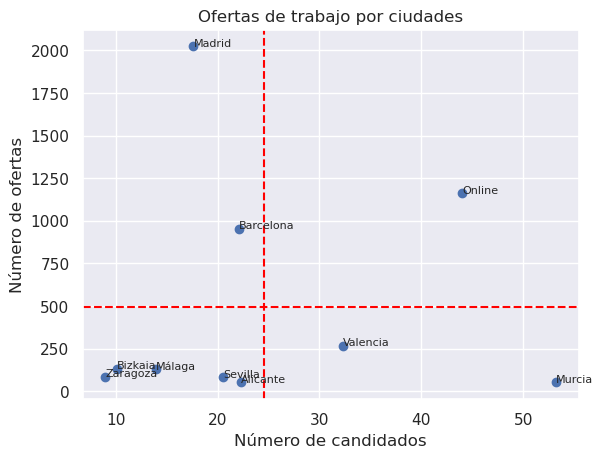

In [19]:
# La siguiente función dibuja graficos con nombres a partir de listas. 
def graficoConNombres (datos_ejex,datos_ejey,datos_nombres,tamagno):

    # La función recibirá series que deberán ser convertidas en listas 
    ejex = pd.Series.tolist (datos_ejex)
    ejey = pd.Series.tolist (datos_ejey)
    nombres = pd.Series.tolist(datos_nombres)
    
    # Disposición de los puntos
    (fig, ax) = plt.subplots() # Creación de figura y posicion: Esta tupla se asocia a un subtrazo, en este caso, el de una figura concreta (fig) y su localizacion (axes)
    ax.scatter(ejey, ejex) # En los puntos definidos a partir de los calculos que la funcion scatter usa al tomar las listas del ejex y ejey, se fijan los axes, es decir, las posiciones de las figuras

    # Asignación de los nombres
    for i, txt in enumerate(nombres): # Este bucle asigna i(indice) u txt(valor) a de uno de los valores de "nombres gracias" a enumerate. Esos valores sirven para rellenar la funcion de annotate que introducirá los nombres. 
        ax.annotate(txt, (ejey[i],ejex[i]),fontsize=tamagno) # Anota txt (es decir, el campo determinado de nombres) en el 

    # Dibujar las líneas divisorias -> en base a los calculos de los datos. 

    plt.axvline(x=datos_ejey.mean(), color='red', linestyle='--') # Linea vertical 
    plt.axhline(y=datos_ejex.mean(), color='red', linestyle='--') # Linea horizontal 

    

x = dataframeCiudades['count'].sort_values(ascending=False)[:10]
y = dataframeCiudades.sort_values(by='count',ascending=False)[:10]['candidates_average']
nombre_ciudades =  dataframeCiudades['count'].sort_values(ascending=False).index[:10]

graficoConNombres (x,y,nombre_ciudades,8)
plt.title('Ofertas de trabajo por ciudades')
plt.ylabel('Número de ofertas')
plt.xlabel('Número de candidados')




## Tarea 2

### Solución del alumno a la Tarea 2.1 : Crea un gráfico tipo barplot que muestre las 15 tecnologías con más ofertas de trabajo.

<Axes: ylabel='tecnologia'>

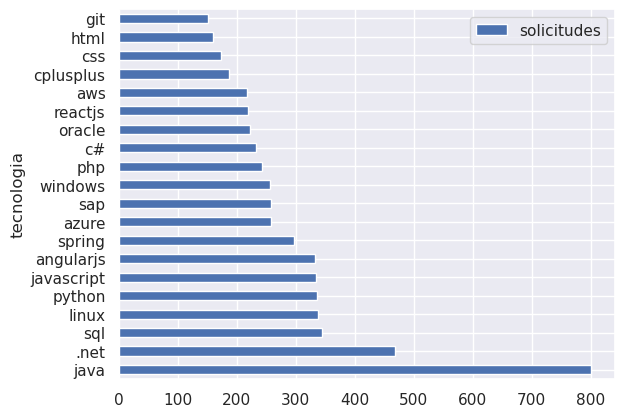

In [23]:
lista_skills_malformada = pd.Series.tolist(df['Skills']) 

# La lista de skills malformada necesita rehacerse 

## Depositaremos la información en la lista_skills
lista_skills = []; 

## La cadena auxiliar guardará las cadenas temporales que se formen
cadena_auxiliar =""; 

## La lista auxiliar, las listas que se formen tras pasar cada registro 
lista_auxiliar = []; 

## Por cada registro, evaluar el caracter: si es una letra, meter el la cadena. Si es una coma o un final de corchete, se considerará una nueva palabra. 
escribir = False; 
for registro in lista_skills_malformada:
    for caracter in registro: 
        if caracter=="'" and escribir==False:
            escribir=True         
        elif caracter=="'" and escribir==True:
            escribir=False
            lista_auxiliar.append(cadena_auxiliar)   
            cadena_auxiliar=""; 
        if escribir==True and caracter !="'":
            cadena_auxiliar = cadena_auxiliar+caracter; 
    lista_skills.append(lista_auxiliar)
    lista_auxiliar = []

            
# Clasificar la lista y convertirla en un diccionario no-basededatos

diccionario_skill = {}; 
skills_registradas = [];

for registro in lista_skills:
    for skill in registro:
        if skill in skills_registradas: 
            diccionario_skill[skill]+=1;
        else: 
            diccionario_skill.update({skill:1})
            skills_registradas.append(skill)
"""
#  Ahora igualamos la columa "Skills" con nuestra lista hacerlo directamente en la base de datos, para ello tenemos la "lista_skills"
df['Skills'] = lista_skills
df['Skills']
"""
# Una vez disponibles los numeros inmediatamente, el diccionario no-basededatos y convertirlo en un diccionario apto para convertir en dataframe

## Estructura: 
diccionario_basededatos_skill = { 
    "tecnologia":[],
    "solicitudes":[]
}

## Escritura

for registro in diccionario_skill.keys():
    diccionario_basededatos_skill["tecnologia"].append(registro);
    
for registro in diccionario_skill.values():
    diccionario_basededatos_skill["solicitudes"].append(registro);

## Conversión 

skills_df = pd.DataFrame(diccionario_basededatos_skill)

skills_df = skills_df.set_index('tecnologia')

# Procesamiento del gráfico
        
skills_df.sort_values(by='solicitudes', ascending=False)[:20].plot.barh()

In [24]:
# Al margen de lo realizado hasta ahora, corregiremos el defecto de la base de datos igualando la lista previamente creada
df['Skills'] = lista_skills
df['Skills']

0                               [php, lms, moodle, mysql]
1                                          [scala, spark]
2                                               [android]
3                    [hyper v, azure, itil, mcafee, o365]
4                                       [python, testing]
                              ...                        
5418                                       [python, .net]
5419                               [rpgle, cobol, as/400]
5420             [ssis, ssrs, sql server, power bi, ssas]
5421    [aws, kubernetes, cd, ci, git, docker, java, o...
5422                            [tia portal, step 7, plc]
Name: Skills, Length: 5423, dtype: object

<Axes: >

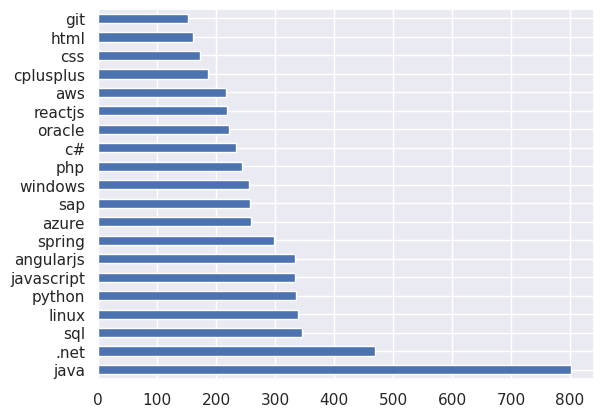

In [28]:
# Podemos recorrer directamente las sublistas de skills sin necesidad de realizar la compleja conversión hecha anteriormente,
# creando simplemente una lista plana a la que se le introducen los valores de un bucle for que explora de manera directa df ['Skills']
lista_plana = []

for sublista in df['Skills']: 
    for skill in sublista:
        lista_plana.append(skill)
pd.Series(lista_plana).value_counts()[:20].plot.barh()
        

# ----------  BORRAR ANTES DE ENTREGAR -------------

In [ ]:
# Datos
altura = [150, 170, 100, 160]
estudiantes = ["Javier", "Carlos", "Hugo", "Samanta"]
posiciones = range (len(estudiantes));
# Orden respecto a altura (eje y)
plt.bar(posiciones, altura)
# Orden respecto a nombre (eje x) 
plt.xticks (posiciones,estudiantes)
# Titulo y etiquetas x e y 
plt.title ('Los estudiantes más flipaos')
plt.ylabel('Altura de los estudiantes');
plt.xlabel ('Estudiantes');
# Visualizar 
plt.show()


In [ ]:
sns.set(style="whitegrid")

# Crear el gráfico de barras
sns.barplot(x=estudiantes, y=altura)

# Título y etiquetas de los ejes
plt.title('Los estudiantes más flipaos')
plt.ylabel('Altura de los estudiantes')
plt.xlabel('Estudiantes')

# Visualizar el gráfico
plt.show()

In [ ]:
dataframeCiudades['count'].sort_values(ascending=False)[:10].mean()